In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

import nengo

In [2]:
model = nengo.Network(label="Basal Ganglia")
with model:
    basal_ganglia = nengo.networks.BasalGanglia(dimensions=3)


class ActionIterator:
    def __init__(self, dimensions):
        self.actions = np.ones(dimensions) * 0.1

    def step(self, t):
        # one action at time dominates
        dominate = int(t % 3)
        self.actions[:] = 0.1
        self.actions[dominate] = 0.8
        return self.actions


action_iterator = ActionIterator(dimensions=3)

with model:
    actions = nengo.Node(action_iterator.step, label="actions")

/Users/reeteshsudhakar/miniconda3/envs/openaigym/lib/python3.8/site-packages/nengo/networks/actionselection.py:186: UserWarning: SciPy is not installed, so BasalGanglia will use the default decoder solver. Installing SciPy may improve BasalGanglia performance.
  warnings.warn(


In [3]:
with model:
    nengo.Connection(actions, basal_ganglia.input, synapse=None)
    thal = nengo.networks.Thalamus(dimensions=3)
    nengo.Connection(basal_ganglia.output, thal.input)
    selected_action = nengo.Probe(thal.output, synapse=0.01)
    input_actions = nengo.Probe(actions, synapse=0.01)

In [4]:
with nengo.Simulator(model) as sim:
    # This will take a while
    sim.run(15)

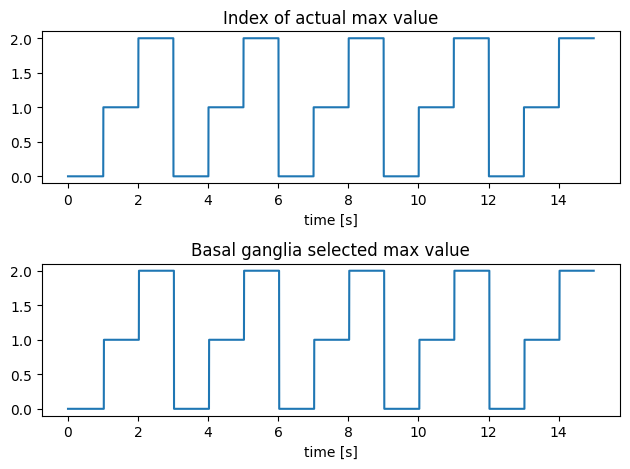

In [5]:
plt.figure()
plt.subplot(2, 1, 1)
plt.plot(sim.trange(), sim.data[input_actions].argmax(axis=1))
plt.ylim(-0.1, 2.1)
plt.xlabel("time [s]")
plt.title("Index of actual max value")
plt.subplot(2, 1, 2)
plt.plot(sim.trange(), sim.data[selected_action].argmax(axis=1))
plt.ylim(-0.1, 2.1)
plt.xlabel("time [s]")
plt.title("Basal ganglia selected max value")
plt.tight_layout()

In [6]:
sim.data[input_actions]

array([[0.        , 0.        , 0.        ],
       [0.07613007, 0.00951626, 0.00951626],
       [0.1450154 , 0.01812692, 0.01812692],
       ...,
       [0.1       , 0.1       , 0.8       ],
       [0.1       , 0.1       , 0.8       ],
       [0.1       , 0.1       , 0.8       ]])